#Импортируем всякое разное (A)
(в этом разделе импортируем всякие библиотечки)

In [5]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

#Подгружаем данные (B)
(в этом разделе импортируем данные, немного корректируем исходную табличку и понимаем, с чем имеем дело)

In [6]:
df = pd.read_csv('/content/Drom_data.csv')
df.head()

,Unnamed: 0,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,2,950000,90.0,9200.0,1.6,2023,0,1,0,1,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,4,1165000,122.0,84594.0,1.8,2019,0,0,1,1,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,7,1145000,122.0,58195.0,1.8,2019,0,1,0,1,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [7]:
#в первом столбике стоят индексы ранней версии таблицы, сейчас индексация новая, поэтому дропнем его
#код нельзя перепрогонять, иначе столбцы будут удаляться и дальше
del df[df.columns[0]]
df.head()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [8]:
#теперь давайте поймем, как выглядят признаки каждого объекта
df.loc[0].tolist()

[1350000,
 122.0,
 86684.0,
 1.8,
 2018,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 'https://auto.drom.ru/moscow/lada/vesta_cross/553824953.html',
 'Лада Веста Кросс']

Заметим, что это несколько количественных переменных (3 штуки и цена), год покупки автомобиля, ссылка на объявление, название автомобиля и много бинарных переменных

#Первичный анализ данных (C)
(в этом разделе уже внимательнее смотрим на данные и делаем предварительные преобразования для того, чтобы в дальнейшем можно было строить регрессии и всякое разное)

In [9]:
#сначала посмотрим, какие масштабы данных для понимания, с чем будем работать
df.describe()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Модель не совпадает с ПТС,0_Мощность двигателя не совпадает с ПТС,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет
count,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,8.269794e+05,97.541342,106336.375975,1.613417,2016.531981,0.068643,0.825273,0.068643,0.934477,0.00624,...,0.012480,0.004680,0.942278,0.039002,0.224649,0.067083,0.716069,0.861154,0.193448,0.556942
std,3.958286e+05,12.755217,79313.194940,0.069424,6.061352,0.253043,0.380030,0.253043,0.247639,0.07881,...,0.111104,0.068305,0.233400,0.193750,0.417677,0.250361,0.451256,0.346055,0.395309,0.497135
min,6.000000e+04,59.000000,69.000000,1.200000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000e+05,87.000000,46749.000000,1.600000,2014.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.750000e+05,98.000000,89589.000000,1.600000,2018.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.115000e+06,106.000000,152000.000000,1.600000,2021.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,2.150000e+06,122.000000,400000.000000,1.800000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#теперь посмотрим, какие признаки есть у автомобилей
df.columns

Index(['Цена', 'Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '

Также следует отметить, что в процессе парсинга данных в каждой группе одна из дамми была "дропнута", чтобы избежать линейной связи между признаками, поэтому в дополнении к указанным колонкам есть еще следующий список: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

Данная особенность сбора данных не влияет на дальнейший анализ, потому что не меняет возможные принимаемые значения, однако ее следует принять к рассмотрению в процессе спецификации модели и размышлениях о релевантности переменных.

In [11]:
#изучим, можно ли сделать название машины используемым признаком или таких названий слишком много
df['Название машины'].nunique()

13

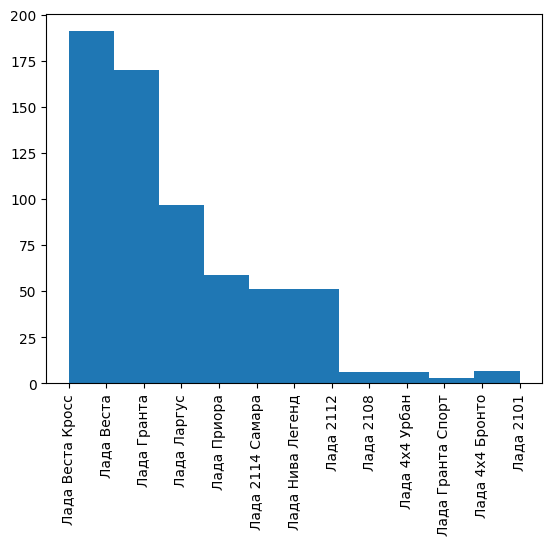

In [12]:
#судя по количеству наблюдений, да, потому что количество машин всего около 640, а "классов" всего 13, посмотрим на гистограмму распределения
plt.hist(df['Название машины'])
plt.xticks(rotation=90)
plt.show()
#для большей части названий наблюдений достаточно, однако для 5 наименований маловато, позже решим, что с этим делать

In [13]:
#дропнем ссылку как неинформативный для регрессии признак:
df_no_link = df.drop(['Ссылка'], axis=1)
df_link = df['Ссылка']
#разделение выборки на признаки и таргет будет позже, когда преобразуем столбик с названиями машин

#Создание базовой регрессии (D)
(в этом разделе создадим модель со всеми исходными (и даже чуть больше) признаками и посмотрим, есть ли в этом смысл)

In [14]:
#попробуем преобразовать название машин в бинарные признаки через onehotencoder, код частично взят из https://habr.com/ru/articles/666234/
enc = OneHotEncoder(sparse=False)

encoded_column = enc.fit_transform(df_no_link[['Название машины']])
one_hot_df = pd.DataFrame(encoded_column, columns=[f'Название машины_{i}' for i in range(len(df_no_link['Название машины'].unique()))])
df_enc = pd.concat([df_no_link.drop(['Название машины'], axis=1), one_hot_df], axis=1)

df_enc.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,Название машины_3,Название машины_4,Название машины_5,Название машины_6,Название машины_7,Название машины_8,Название машины_9,Название машины_10,Название машины_11,Название машины_12
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Заметим, что количество признаков увеличилось на 11, это получилось так: убрав название машин из признаков изначально получим 42 признака (df_no_link), прибавим 12 наименований (13-1 из-за того, что можно "отнормировать" к одному названию) и получим 54 (или +11) признака

In [15]:
#теперь у нас есть огромная таблица с кучей признаков. попробуем прогнать регрессию, что называется, в лоб,
#чтобы прикинуть на глаз, есть ли мультиколлинеарность или все и так хорошо
df_y = df_enc['Цена']
df_X = df_enc.drop(['Цена'], axis=1)

X = sm.add_constant(df_X)
model_0 = sm.OLS(df_y, X).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 10 May 2024   Prob (F-statistic):          5.97e-290
Time:                        01:39:15   Log-Likelihood:                -8362.2
No. Observations:                 641   AIC:                         1.682e+04
Df Residuals:                     591   BIC:                         1.705e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Несмотря на то, что R^2 оказался довольно большим, мы видим, что многие коэффициенты оказались отрицательными, хотя по идее они должны вносить положительный вклад (например, объем двигателя). Более того, в категориальных группах (например, типов кузовов и названий машин) отрицательными являются все коэффициенты, а значит в таких группах никакой признак не является "предпочтительным", то есть вся группа вносит отрицательный вклад (это так не должно работать).

Получается, что так как многие коэффициенты очень большие по модулю и отрицательные, причем их отрицательность противоречит экономической интуиции, то, скорее всего, в данных присутствует мультиколлинеарность.

In [16]:
#проверим предположение о мультиколлинеарности, посчитав VIF-ы
#ниже мы увидим, что VIF -> inf, а значит будет присутствовать деление на ноль, чтобы избежать предупреждений поставим заглушку
warnings.filterwarnings("ignore")

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif["features"] = df_X.columns

vif = vif.round(1)
vif

,VIF,features
0,6.2,Мощность
1,2.4,Пробег
2,4.3,Объём двигателя
3,9.9,Год
4,3.7,Коробка передач_вариатор
5,5.1,Коробка передач_механика
6,3.3,Коробка передач_робот
7,inf,Привод_передний
8,inf,Привод_задний
9,1.3,Тип кузова_джип/suv 5 дв.


In [17]:
#посмотрим VIF-ы в виде массива
vif['VIF'].values

array([6.20000e+00, 2.40000e+00, 4.30000e+00, 9.90000e+00, 3.70000e+00,
       5.10000e+00, 3.30000e+00,         inf,         inf, 1.30000e+00,
               inf,         inf,         inf,         inf,         inf,
               inf, 1.90000e+00, 2.20000e+00, 1.30000e+00, 4.10000e+00,
       1.20000e+00, 5.20000e+00, 4.70000e+00, 3.00000e+00, 7.40000e+00,
       9.80000e+00, 4.90000e+00, 1.10000e+00, 1.07000e+01, 1.42000e+01,
       9.60000e+00, 4.20000e+00, 3.69000e+01, 2.65000e+01, 2.00000e+00,
       1.90000e+00, 1.10000e+00, 1.40000e+00, 1.70000e+00, 1.80000e+00,
               inf,         inf,         inf,         inf, 5.11050e+03,
       1.02089e+04,         inf,         inf,         inf,         inf,
               inf, 4.94684e+04,         inf])

Заметим, что много VIF-ов стремятся к бесконечности, особенно это касается названия машин и типов кузовов. В принципе, это было понятно еще из таблички с результатами оценивания регрессии, потому что именно эти группы имели самые подозрительные коэффициенты. Также присутствует много больших VIF-ов, с ними тоже что-то надо делать.

In [18]:
#проверим, сколько VIF-ов стремятся к бесконечности и по каким признакам:
vif[vif['VIF']==np.inf]

,VIF,features
7,inf,Привод_передний
8,inf,Привод_задний
10,inf,Тип кузова_лифтбек
11,inf,Тип кузова_минивэн
12,inf,Тип кузова_седан
13,inf,Тип кузова_универсал
14,inf,Тип кузова_хэтчбек 3 дв.
15,inf,Тип кузова_хэтчбек 5 дв.
40,inf,Название машины_0
41,inf,Название машины_1


Получилось, что в данных и правда присутствует мультиколлинеарность, значит базовая регрессия со всеми признаками едва ли хорошая идея. Попробуем что-то придумать!

Самое логичное - отредактировать признаки так, чтобы снизить мультиколлинеарность и сделать их более агрегированными, общими. Приглашаем в следующий раздел!

#Вторичный анализ данных (E)
(в этом разделе отредактируем признаки, уберем самые скоррелированные и постараемся починить мультиколлинеарность как сможем)

In [19]:
#для начала еще раз выведем признаки с большими VIF-ми, потому что именно в этом множестве и содержатся скоррелированные переменные
#положим, что VIF чрезмерный, если он больше 5
vif[vif['VIF']>5]

,VIF,features
0,6.2,Мощность
3,9.9,Год
5,5.1,Коробка передач_механика
7,inf,Привод_передний
8,inf,Привод_задний
10,inf,Тип кузова_лифтбек
11,inf,Тип кузова_минивэн
12,inf,Тип кузова_седан
13,inf,Тип кузова_универсал
14,inf,Тип кузова_хэтчбек 3 дв.


<Axes: >

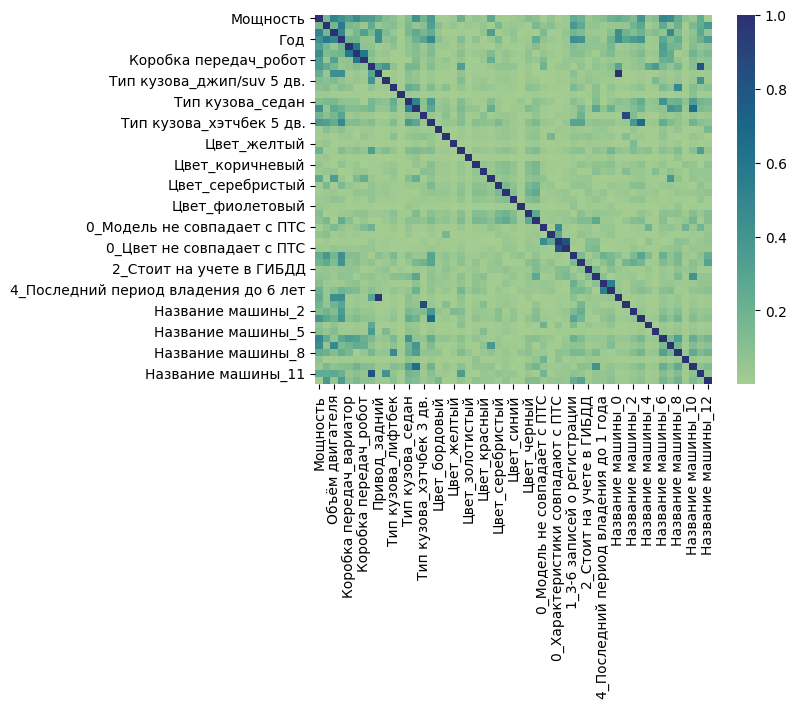

In [20]:
#теперь посмотрим на корреляции переменных
#значения возьмем по модулю, потому что важно само отклонение, а не его знак (ну он тоже важен, но пока возьмем значение)
corr_matrix_abs = df_X.corr().abs()

sns.heatmap(corr_matrix_abs, cmap="crest")

По тепловой матрице видим, что в целом корреляции не везде большие, однако присутствуют отдельные "подозрительные" точки, которые надо отправить в корреляционный патруль и разобраться, что с ними делать.

In [21]:
#выведем 10 самых скоррелированных пар
n_E = 10

corr_matrix = df_X.corr()
mask_E = np.triu(np.ones_like(corr_matrix_abs, dtype=bool), k=1)
corr_values = corr_matrix_abs.where(mask_E)
pairs = corr_values.unstack().sort_values(ascending=False).dropna()
pairs_top_10 = pairs[:10]

print(f"Топ {n_E} пар наиболее скоррелированных признаков:")
for index, pair in enumerate(pairs_top_10.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Топ 10 пар наиболее скоррелированных признаков:
1. Название машины_0 и Привод_задний: 1.00
2. Название машины_1 и Тип кузова_хэтчбек 3 дв.: 0.86
3. Название машины_11 и Привод_передний: -0.82
4. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
5. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
6. Название машины_10 и Тип кузова_универсал: 0.66
7. Коробка передач_механика и Коробка передач_вариатор: -0.59
8. Коробка передач_робот и Коробка передач_механика: -0.59
9. Год и Пробег: -0.57
10. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55


In [22]:
#а теперь выведем все пары, у которых корреляция больше 0.5 по модулю:
pairs_thres = pairs[pairs>0.5]

print(f"Пары с корреляцией по модулю >0.5:")
for index, pair in enumerate(pairs_thres.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Пары с корреляцией по модулю >0.5:
1. Название машины_0 и Привод_задний: 1.00
2. Название машины_1 и Тип кузова_хэтчбек 3 дв.: 0.86
3. Название машины_11 и Привод_передний: -0.82
4. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
5. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
6. Название машины_10 и Тип кузова_универсал: 0.66
7. Коробка передач_механика и Коробка передач_вариатор: -0.59
8. Коробка передач_робот и Коробка передач_механика: -0.59
9. Год и Пробег: -0.57
10. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55
11. Тип кузова_универсал и Тип кузова_седан: -0.52
12. Объём двигателя и Мощность: 0.51


Итак, нужно что-то сделать с названиями машин, типами кузовов, приводами и кое-чем еще.

Приступим!

In [23]:
#еще раз выведем все колонки, чтобы понять, какие из них можно агрегировать и выделить общую бинарную переменную:
df_X.columns

Index(['Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '4_Послед

Еще раз напомним о списке дропнутых дамми, которые здесь, как то самое ружье на стене, выстреливают: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

**Итак, исходя из логических соображений, можно предположить, что релевантны следующие преобразования:**




1) **Удалить в целом признак "Название машины"**.
Во-первых, данная категория сильно повышает мультиколлинеарность, так как хорошо описывается другими переменными (например, мощностью, коробкой передач, объемом двигателя, приводом и кузовом. Да, кузовы могут быть разными у модели, но все равно варианты ограничены: едва ли мини купер можно купить в комплектации минивэна.
Во-вторых, у данной переменной нет экономическо-исследовательского смысла с точки зрения построения функции гедонистического спроса. У нас присутствует 13 машин, каждая из которых, по факту, есть совокупность упомянутых выше характеристик (концептуально 13 (хотя бы такого порядка) совокупностей). Проще говоря, каждая X_i модель в конкретной комплектации стоит на рынке (отличие первичного от вторичного в данном контексте минимально) Y_i рублей, эта цена известна и стабильна, а значит анализировать влияние названия машины нет смысла (оно и так известно).

2) **В группе коробок передач сделать бинарную переменную "Механика или не механика"**. Предполагается выделение именно механики, потому что она сильнее всего отличается от остальных типов, а они, в свою очередь, довольно похожи друг на друга.

3) **В группе приводов сделать бинарную переменную "Передний или не передний"**. Выделение основывается на том, что передний привод сильнее всего отличается от остальных в представленности в наблюдениях и лучше выделяет класс условно "обычных" машин от "необычных" в данной группе.

4) **В группе кузовов сделать несколько бинарных переменных, которые обозначают "Джип", "Лифтбек", "Хэтчбек", "Минивэн", "Седан" и "Универсал".**
Было решено укрупнить отдельные группы (по дверям) и оставить типы как бинарные переменные. Почему? Потому что одна и та же модель машины может быть представлена в разных кузовах, причем данный признак хоть и является вариативным (можно купить схожую машину, но с другим кузовом), но эта вариативность ограничена (на вторичном рынке подобрать такой же пробег или юридическую историю сложнее), а также признак не может быть изменен как, например, цвет.
То есть основная причина рассмотрения данного признака это существенное различие комплектаций на первичном и вторичном рынках (на вторичном нельзя (очень сложно) купить такую же, но с другим кузовом).

5) **В группе цветов сделать бинарную переменную "Классический цвет или нет"**. К классическим цветам отнесем черный, белый, серый и серебристый. На эти 4 цвета приходится около 70% всех автомобилей в России (см. https://news.drom.ru/79717.html)

6) **В группе юридических аспектов автомобиля (ПТС) сделать бинарную переменную "Есть ли несовпадения или нет"**. Тогда любое нарушение и несовпадение будет означать 1, а их полное отсутствие 0.

7) Остальные признаки оставить без изменений, так как они относительно независимы и могут рассматриваться отдельно от подавляющего большинства первичных и вторичных характеристик объявления.

Теперь внесем упомянутые коррективы!


In [24]:
#удаляем название машины:
df_X_new = df_X.iloc[:, :-13]

#сделаем бинарную переменную механика или нет:
df_X_new.rename(columns = {'Коробка передач_механика':'КП механическая'}, inplace = True)
df_X_new.drop(['Коробка передач_вариатор', 'Коробка передач_робот'], axis=1, inplace=True)

#сделаем бинарную переменную передний или задний привод:
df_X_new.rename(columns = {'Привод_передний':'Привод передний'}, inplace = True)
df_X_new.drop(['Привод_задний'], axis=1, inplace=True)

#сделаем бинарные переменные о типах кузовов:
kuz = ['Кузов_лифтбек', 'Кузов_минивен', 'Кузов_седан', 'Кузов_универсал', 'Кузов_хэтчбек'] #список с типами понадобится ниже

df_X_new.rename(columns = {'Тип кузова_лифтбек':'Кузов_лифтбек'}, inplace = True) #тут просто переименовываем столбцы
df_X_new.rename(columns = {'Тип кузова_минивэн':'Кузов_минивен'}, inplace = True)
df_X_new.rename(columns = {'Тип кузова_седан':'Кузов_седан'}, inplace = True)
df_X_new.rename(columns = {'Тип кузова_универсал':'Кузов_универсал'}, inplace = True)

df_X_new['Кузов_хэтчбек'] = df_X['Тип кузова_хэтчбек 5 дв.'] + df_X['Тип кузова_хэтчбек 3 дв.'] #здесь мерджим в одну группу хэтчбеки
df_X_new.drop(['Тип кузова_хэтчбек 5 дв.', 'Тип кузова_хэтчбек 3 дв.'], axis=1, inplace=True)

df_X_new['Кузов_джип'] = df_X['Тип кузова_джип/suv 5 дв.'] + np.prod([df_X_new[i]==0 for i in kuz], axis=0) #восстановим дропнутый класс джипов
df_X_new.drop(['Тип кузова_джип/suv 5 дв.'], axis=1, inplace=True)

df_X_new.drop(['Кузов_минивен'], axis=1, inplace=True)

#сделаем бинарную переменную о цвете:
cl_col = ['Цвет_белый', 'Цвет_черный', 'Цвет_серебристый', 'Цвет_серый']
colors = ['Цвет_бордовый', 'Цвет_голубой', 'Цвет_желтый', 'Цвет_зеленый',
          'Цвет_золотистый', 'Цвет_коричневый', 'Цвет_красный', 'Цвет_оранжевый',
          'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий', 'Цвет_фиолетовый',
          'Цвет_черный', 'Цвет_белый']

df_X_new['Классический цвет'] = np.sum([df_X_new[i] for i in cl_col], axis=0)
df_X_new.drop(colors, axis=1, inplace=True)

#сделаем бинарную переменную о существовании несовпадений:
df_X_new.rename(columns = {'0_Характеристики совпадают с ПТС':'ПТС без нарушений'}, inplace = True)
df_X_new.drop(['0_Модель не совпадает с ПТС', '0_Мощность двигателя не совпадает с ПТС', '0_Цвет не совпадает с ПТС'], axis=1, inplace=True)

#для красоты переименуем оставшиеся колонки:
df_X_new.rename(columns = {'2_Стоит на учете в ГИБДД':'Стоит на учете в ГИБДД'}, inplace = True)

df_X_new['Был во владении у юр. лица'] = 1 - df_X_new['3_Не был во владении у юр. лица']
df_X_new.drop('3_Не был во владении у юр. лица', axis=1, inplace=True)

df_X_new.rename(columns = {'4_Последний период владения до 1 года':'Последний период владения до 1 года'}, inplace = True)
df_X_new.rename(columns = {'4_Последний период владения до 6 лет':'Последний период владения до 6 лет'}, inplace = True)

df_X_new['1-2 записей о регистрации'] = 1 - df_X_new['1_3-6 записей о регистрации'] - df_X_new['1_более 6 записей о регистрации']
df_X_new.rename(columns = {'1_3-6 записей о регистрации':'3-6 записей о регистрации'}, inplace = True)
df_X_new.drop('1_более 6 записей о регистрации', axis=1, inplace=True)

df_X_new = df_X_new[['Мощность', 'Объём двигателя', 'Пробег', 'Год',
                    'КП механическая', 'Привод передний', 'Стоит на учете в ГИБДД', 'Классический цвет', 'Был во владении у юр. лица',
                    'Кузов_универсал', 'Кузов_седан', 'Кузов_лифтбек', 'Кузов_хэтчбек', 'Кузов_джип',
                    '1-2 записей о регистрации', '3-6 записей о регистрации',
                    'Последний период владения до 1 года', 'Последний период владения до 6 лет']]

df_X_new.head()

,Мощность,Объём двигателя,Пробег,Год,КП механическая,Привод передний,Стоит на учете в ГИБДД,Классический цвет,Был во владении у юр. лица,Кузов_универсал,Кузов_седан,Кузов_лифтбек,Кузов_хэтчбек,Кузов_джип,1-2 записей о регистрации,3-6 записей о регистрации,Последний период владения до 1 года,Последний период владения до 6 лет
0,122.0,1.8,86684.0,2018,1,1,1,1,0,1,0,0,0,0,1,0,0,1
1,122.0,1.8,77400.0,2019,0,1,1,1,0,1,0,0,0,0,1,0,0,1
2,90.0,1.6,9200.0,2023,1,1,1,1,0,0,1,0,0,0,1,0,0,0
3,122.0,1.8,84594.0,2019,0,1,0,1,1,1,0,0,0,0,1,0,0,1
4,122.0,1.8,58195.0,2019,1,1,0,1,0,0,1,0,0,0,1,0,0,1


Получается, что имеем следующие переменные:

***'Мощность', 'Пробег', 'Объём двигателя', 'Год'*** - количественные переменные

***'КП механическая', 'Привод передний', 'Стоит на учете в ГИБДД', 'Классический цвет' и 'Был во владении у юр. лица'*** - бинарные переменные

***'Кузов_лифтбек', 'Кузов_седан', 'Кузов_универсал', 'Кузов_хэтчбек' и  'Кузов_джип'*** - бинарные переменные общего признака "Тип кузова" с нулевым вариантом "Минивен"

 ***'1-2 записей о регистрации' и  '3-6 записей о регистрации'*** - бинарные переменные общего признака "Количество записей о регистрации" с нулевым вариантом "Больше 6 записей о регистрации"

 ***'Последний период владения до 1 года' и 'Последний период владения до 6 лет'*** - бинарные переменные общего признака "Время последнего периода владения" с нулевым вариантом "Последний период владения больше 6 лет"

In [25]:
#прогоним регрессию по новой таблице:

X_new = sm.add_constant(df_X_new)
model_new = sm.OLS(df_y, X_new).fit()

print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     210.2
Date:                Fri, 10 May 2024   Prob (F-statistic):          2.62e-250
Time:                        01:39:17   Log-Likelihood:                -8543.2
No. Observations:                 641   AIC:                         1.712e+04
Df Residuals:                     622   BIC:                         1.721e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [26]:
warnings.filterwarnings("ignore")

vif_new = pd.DataFrame()
vif_new["VIF"] = [variance_inflation_factor(df_X_new.values, i) for i in range(df_X_new.shape[1])]
vif_new["features"] = df_X_new.columns

vif_new = vif_new.round(1)
vif_new

,VIF,features
0,180.4,Мощность
1,1269.7,Объём двигателя
2,4.4,Пробег
3,1191.4,Год
4,7.5,КП механическая
5,161.3,Привод передний
6,3.7,Стоит на учете в ГИБДД
7,3.5,Классический цвет
8,1.4,Был во владении у юр. лица
9,71.7,Кузов_универсал


VIF-ы стали лучше. Присутствует несколько очень больших значений, но они хотя бы не бесконечность, теперь будем думать дальше. Для начала давайте посмотрим на корреляции.

<Axes: >

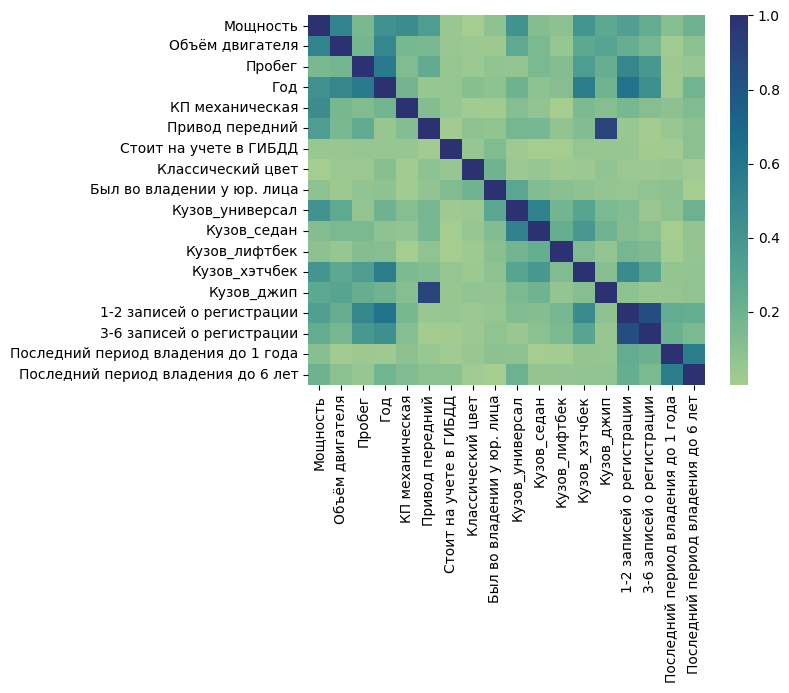

In [27]:
corr_matrix_abs_new = df_X_new.corr().abs()

sns.heatmap(corr_matrix_abs_new, cmap="crest")

In [28]:
corr_matrix_new = df_X_new.corr()
mask_new = np.triu(np.ones_like(corr_matrix_abs_new, dtype=bool), k=1)
corr_values_new = corr_matrix_abs_new.where(mask_new)
pairs_new = corr_values_new.unstack().sort_values(ascending=False).dropna()
pairs_top_10_new = pairs_new[:10]

print(f"Топ 10 пар наиболее скоррелированных признаков:")
for index, pair in enumerate(pairs_top_10_new.index, start=1):
    col1, col2 = pair
    val = corr_matrix_new[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Топ 10 пар наиболее скоррелированных признаков:
1. Кузов_джип и Привод передний: -0.90
2. 3-6 записей о регистрации и 1-2 записей о регистрации: -0.84
3. 1-2 записей о регистрации и Год: 0.62
4. Год и Пробег: -0.57
5. Последний период владения до 6 лет и Последний период владения до 1 года: -0.55
6. Кузов_хэтчбек и Год: -0.55
7. Кузов_седан и Кузов_универсал: -0.52
8. Объём двигателя и Мощность: 0.51
9. 1-2 записей о регистрации и Пробег: -0.49
10. Год и Объём двигателя: 0.49


Итак, корреляции все еще очень большие как и некоторые VIF-ы, однако сейчас уже понятно, что надо делать. В целом, главный инсайт такой: сделать общую регрессию с такими признаками сложно, возможно, вообще невозможно, поэтому нужно конкретизировать модели, для которых мы строим регрессии и признаки, которые мы используем. Происходит это из-за того, что у нас слишком разные машины и признаки сильно варьируются для них. Джипам, например, свойственен соответствующий кузов, но вместе переднего привода там полный (4WD) и так далее.

В общем, бейзлайн сделан, дальше нужно лучше специфицировать модели и признаки.

#Разные регрессии (F)
(здесь построены варианты моделей для разных данных и признаков)

In [29]:
#регрессия только для цветов
colors = df.columns[17:31]

X_color = sm.add_constant(df_enc[colors])
model_color = sm.OLS(df_enc['Цена'], X_color).fit()

print(model_color.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7.714
Date:                Fri, 10 May 2024   Prob (F-statistic):           3.69e-15
Time:                        01:39:18   Log-Likelihood:                -9119.7
No. Observations:                 641   AIC:                         1.827e+04
Df Residuals:                     626   BIC:                         1.834e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.981e+05   1.07e+05  

In [30]:
#регрессия только для названий машин
names = df_enc.columns[-13:]

X_name = sm.add_constant(df_enc[names])
model_name = sm.OLS(df_enc['Цена'], X_name).fit()

print(model_name.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     173.0
Date:                Fri, 10 May 2024   Prob (F-statistic):          5.44e-190
Time:                        01:39:18   Log-Likelihood:                -8702.7
No. Observations:                 641   AIC:                         1.743e+04
Df Residuals:                     628   BIC:                         1.749e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.264e+05   1.63

#Черновик

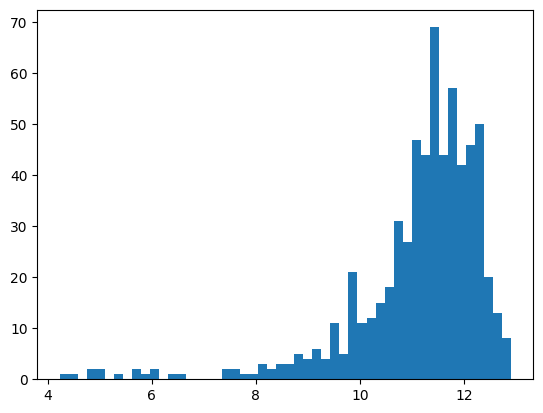

In [31]:
plt.hist(np.log(df['Пробег']), 50)
plt.show()

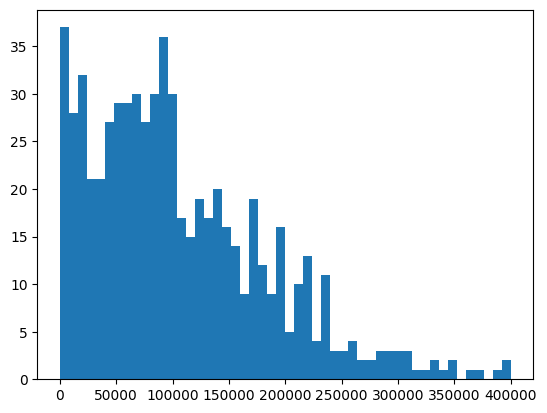

In [32]:
plt.hist(df['Пробег'], 50)
plt.show()

In [33]:
df_test = pd.read_csv('/content/Drom_data_nodrop.csv')
df_test

,Unnamed: 0,Мощность,Коробка передач,Привод,Тип кузова,Цвет,Пробег,Руль,Поколение,Цена,...,4,5,6,Ссылка,Комплектация,Особые отметки,Топливо двигателя,Объём двигателя,Год,Название машины
0,0,122.0,механика,передний,универсал,серый,86684.0,левый,1 поколение,1350000.0,...,Последний период владения больше 5 лет,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/vesta_cross/5...,NaN,NaN,бензин,1.8,2018.0,Лада Веста Кросс
1,1,122.0,робот,передний,универсал,белый,77400.0,левый,1 поколение,1350000.0,...,Последний период владения больше 4 лет,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/vesta/2447192...,NaN,NaN,бензин,1.8,2019.0,Лада Веста
2,"2,90.0,механика,передний,седан,белый,9200.0,ле...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,83.0,механика,4WD,NaN,зеленый,76916.0,левый,1 поколение,655000.0,...,Последний период владения больше 4 лет,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/2121_4x4_niva...,NaN,NaN,бензин,1.7,2016.0,Лада 4x4 2121 Нива
4,4,122.0,робот,передний,универсал,черный,84594.0,левый,1 поколение,1165000.0,...,Последний период владения больше 2 лет,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/vesta_cross/9...,NaN,NaN,бензин,1.8,2019.0,Лада Веста Кросс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,"1308,83.0,механика,4WD,,синий,39500.0,левый,""1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,1309,122.0,робот,передний,универсал,красный,71127.0,левый,1 поколение,1249000.0,...,Последний период владения больше 5 лет,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/vesta_cross/2...,NaN,NaN,бензин,1.8,2018.0,Лада Веста Кросс
1310,1310,98.0,механика,передний,хэтчбек 5 дв.,серый,237000.0,левый,1 поколение,360000.0,...,Последний период владения больше 6 месяцев,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/priora/268769...,1.6 MT Люкс 21723-83-039,NaN,бензин,1.6,2009.0,Лада Приора
1311,1311,72.0,механика,задний,NaN,зеленый,127000.0,NaN,1 поколение,295000.0,...,Последний период владения больше 6 месяцев,Не числится в розыске,Ограничений не обнаружено,https://auto.drom.ru/moscow/lada/2107/12622377...,1.6 MT 21074-40-015,NaN,бензин,1.6,2010.0,Лада 2107


In [36]:
df_test.isna().sum()

Unnamed: 0              0
Мощность              239
Коробка передач       233
Привод                234
Тип кузова            640
Цвет                  250
Пробег                235
Руль                  416
Поколение             246
Цена                  230
0                     259
1                     259
2                     259
3                     259
4                     259
5                     259
6                     259
Ссылка                230
Комплектация          885
Особые отметки       1275
Топливо двигателя     232
Объём двигателя       233
Год                   230
Название машины       259
dtype: int64

In [40]:
df_test['Особые отметки'].unique()

array([nan, 'требуется ремонт или не на ходу',
       'документы с проблемами или отсутствуют'], dtype=object)

In [46]:
df_test['Название машины'].value_counts()

Название машины
Лада Веста            156
Лада Ларгус           111
Лада 2107              80
Лада Гранта            79
Лада 2114 Самара       70
Лада Приора            66
Лада Веста Кросс       55
Лада Калина            47
Лада 2115 Самара       43
Лада Нива Легенд       36
Лада 2105              34
Лада 2112              29
Лада Ларгус Кросс      29
Лада 4x4 2121 Нива     28
Лада 2106              25
Лада 21099             23
Лада 2104              22
Лада 2110              18
Лада 2101              15
Лада Нива Тревел       14
Лада 4x4 2131 Нива     13
Лада 2113 Самара       10
рей Кросс               9
Лада Веста Спорт        8
Лада 2111               8
Лада Калина Кросс       6
Лада Гранта Кросс       5
Лада 4x4 Урбан          4
Лада 2108               2
Лада 2109               2
Лада Гранта Спорт       2
Лада 2103               2
Лада Калина Спорт       1
Лада 4x4 Бронто         1
Лада 1111 Ока           1
Name: count, dtype: int64

In [53]:
df_test['Цвет'].value_counts()

Цвет
белый          218
черный         134
серебристый    123
серый          122
синий          111
зеленый         98
коричневый      69
красный         69
бордовый        38
бежевый         25
оранжевый       23
голубой         16
фиолетовый      13
желтый           3
золотистый       1
Name: count, dtype: int64

In [52]:
df_test.groupby(['Цвет'])['Цена'].mean().sort_values(ascending=False)

Цвет
оранжевый      1.092913e+06
коричневый     9.265030e+05
белый          8.598489e+05
золотистый     7.980000e+05
желтый         6.683333e+05
голубой        6.532500e+05
серый          6.444836e+05
красный        5.792029e+05
бежевый        5.732400e+05
черный         5.631626e+05
синий          5.474063e+05
серебристый    5.102493e+05
зеленый        4.536860e+05
бордовый       2.578158e+05
фиолетовый     1.822308e+05
Name: Цена, dtype: float64